In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print(train.shape)
print(train.size)

(891, 12)
10692


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


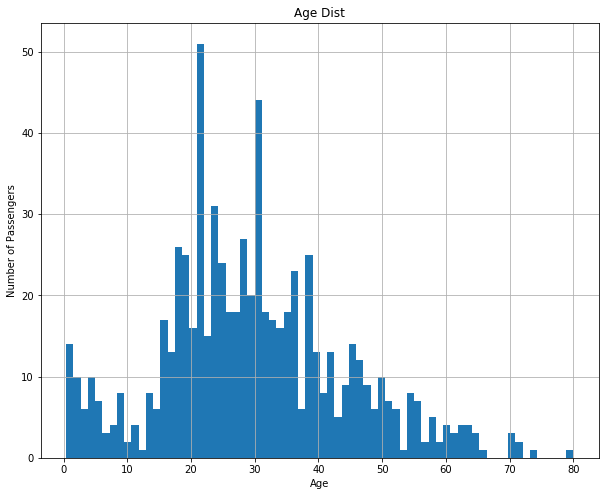

In [6]:
plt.figure(figsize=(10,8))
train['Age'].hist(bins=70)
plt.title("Age Dist")
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.show()

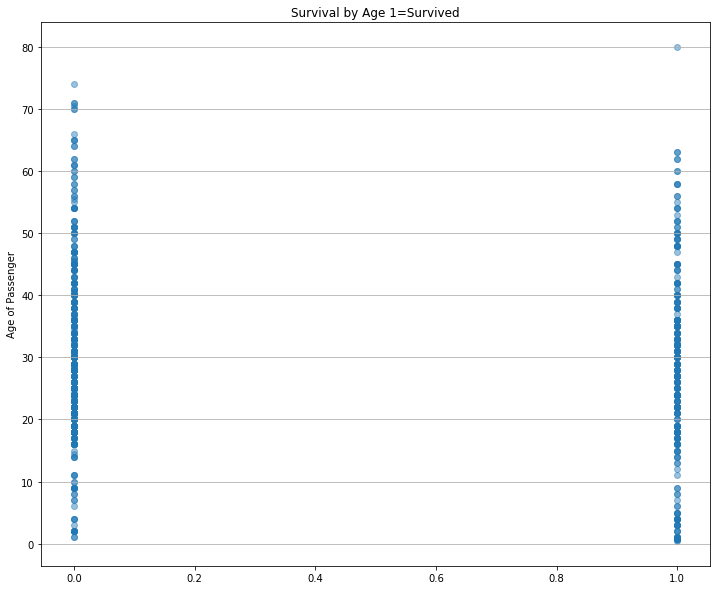

In [7]:
plt.figure(figsize=(12,10))
plt.scatter(train.Survived,train.Age,alpha=.45)
plt.ylabel('Age of Passenger')
plt.title('Survival by Age 1=Survived')
plt.grid(b=True,which='major',axis='y')
plt.show()

In [8]:
from sklearn.linear_model import LogisticRegression

In [10]:
test = pd.read_csv('test.csv')

In [11]:
test['Sex']=test['Sex'].apply(lambda sex:1 if sex=='male' else 0)

In [12]:
test['Age']=test['Age'].fillna(test['Age'].mean())

In [13]:
test['Fare']=test['Fare'].fillna(test['Fare'].mean())

In [14]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S


In [15]:
train['Sex']=train['Sex'].apply(lambda sex:1 if sex=='male' else 0)

In [16]:
train['Age']=train['Age'].fillna(test['Age'].mean())

In [17]:
train['Fare']=train['Fare'].fillna(test['Fare'].mean())

In [18]:
survived=train['Survived'].values

In [20]:
cols=["Pclass","Sex","Age"]

In [21]:
data_train = train[cols].values

In [22]:
data_test = test[cols].values

In [23]:
model = LogisticRegression()

In [24]:
model.fit(data_train,survived)

C:\Users\evert\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
predict=model.predict(data_test)

In [26]:
predict

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [27]:
#model persistance 
import pickle as pkl

In [28]:
persist_model = pkl.dumps(model)

In [29]:
persist_model

b'\x80\x03csklearn.linear_model.logistic\nLogisticRegression\nq\x00)\x81q\x01}q\x02(X\x07\x00\x00\x00penaltyq\x03X\x02\x00\x00\x00l2q\x04X\x04\x00\x00\x00dualq\x05\x89X\x03\x00\x00\x00tolq\x06G?\x1a6\xe2\xeb\x1cC-X\x01\x00\x00\x00Cq\x07G?\xf0\x00\x00\x00\x00\x00\x00X\r\x00\x00\x00fit_interceptq\x08\x88X\x11\x00\x00\x00intercept_scalingq\tK\x01X\x0c\x00\x00\x00class_weightq\nNX\x0c\x00\x00\x00random_stateq\x0bNX\x06\x00\x00\x00solverq\x0cX\x04\x00\x00\x00warnq\rX\x08\x00\x00\x00max_iterq\x0eKdX\x0b\x00\x00\x00multi_classq\x0fh\rX\x07\x00\x00\x00verboseq\x10K\x00X\n\x00\x00\x00warm_startq\x11\x89X\x06\x00\x00\x00n_jobsq\x12NX\x08\x00\x00\x00l1_ratioq\x13NX\x08\x00\x00\x00classes_q\x14cnumpy.core.multiarray\n_reconstruct\nq\x15cnumpy\nndarray\nq\x16K\x00\x85q\x17C\x01bq\x18\x87q\x19Rq\x1a(K\x01K\x02\x85q\x1bcnumpy\ndtype\nq\x1cX\x02\x00\x00\x00i8q\x1dK\x00K\x01\x87q\x1eRq\x1f(K\x03X\x01\x00\x00\x00<q NNNJ\xff\xff\xff\xffJ\xff\xff\xff\xffK\x00tq!b\x89C\x10\x00\x00\x00\x00\x00\x00\x00\x00\x

In [31]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [32]:
joblib.dump(model,'regmodel.pkl')

['regmodel.pkl']

In [33]:
model_new = joblib.load('regmodel.pkl')

In [34]:
model_new

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
test_pred = [[1,0,23],[3,1,67],[2,0,43]]  ##going by column [pclass,sex,age]

In [36]:
model_new.predict(test_pred)

array([1, 0, 1], dtype=int64)

In [37]:
model.predict(test_pred)

array([1, 0, 1], dtype=int64)